## 1. 다음과 같은 어레이를 Numpy를 이용하여 한 줄로 만드시오.

In [1]:
import numpy as np
np.arange(0.,5.,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [2]:
np.arange(1,11).reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [3]:
np.identity(n=3, dtype=np.int8)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

In [4]:
np.ones((4,4), dtype=np.int32)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [5]:
np.arange(1, 24, 2).reshape(3,4)

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

## 2. 다음과 같은 데이터프레임을 만드시오.
- 단, 증가율은 계산으로 만들 것

In [6]:
import pandas as pd
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
}
columns = ["지역", "2015", "2010", "2005", "2000"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df['2010-2015 증가율'] = (df['2015'] / df['2010'] - 1).round(4)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0164
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


## 3. 타이타닉호 승객에 대해서 다음을 구하시오.

In [7]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

**1) 성별(sex) 인원수, 선실별(class) 인원수, 사망/생존(alive) 인원수를 구하시오.**

In [8]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [9]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [10]:
titanic.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

**2) '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구하시오.<br>
단, 나이의 기준은 [1, 15, 30, 45, 60, 99] 임.**

In [11]:
bins = [1, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
age_ = pd.cut(titanic['age'], bins, labels=labels)
age_.dropna(inplace = True)
pd.value_counts(age_)/sum(pd.value_counts(age_))

청년      0.311429
중년      0.280000
장년      0.278571
미성년자    0.098571
노년      0.031429
Name: age, dtype: float64

## 4. 팁 데이터에 대해서 다음을 구하시오.

In [12]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


**1) 팁의 비율(단위 %)을 소숫점 2째자리까지 구하시오.**

In [13]:
tips['tip_pct'] = (tips['tip'] / tips['total_bill'] * 100).round(2)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82
243,18.78,3.00,Female,No,Thur,Dinner,2,15.97


**2) 팁의 비율이 가장 높은 날은 목, 금, 토, 일요일 중 어떤 날인지 피봇 테이블을
      이용하여 구하시오.**

In [20]:
tips.pivot_table('tip_pct','day')

,tip_pct
day,
Thur,16.126452
Fri,16.991579
Sat,15.314598
Sun,16.689605


## 5. 다음의 지시대로 SQLite3를 이용하는 파이썬 프로그램을 작성하시오.

In [14]:
import sqlite3
conn = sqlite3.connect('./exam.db') 

**1) 필드로 [백넘버(PK), 이름, 포지션]을 갖는 테이블 Eagles를 생성**

In [15]:
cur = conn.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS Eagles \
    (back_no INT NOT NULL, \
     name TEXT, \
     position TEXT, \
     PRIMARY KEY(back_no));')
conn.commit()

**2) 1)번에서 만든 테이블에 (8, 정근우, 내야수)를 포함하여 임의로 5명의 선수를 삽입**

In [16]:
cur = conn.cursor()
cur.execute("INSERT INTO Eagles('back_no', 'name', 'position') \
             VALUES (8, '정근우', '내야수');")
cur.execute("INSERT INTO Eagles VALUES (30, '호잉', '외야수'), \
             (17, '김범수', '투수'), (38, '안영명', '투수'), \
             (13, '최재훈', '포수'), (43, '정은원', '내야수');")
conn.commit()

**3) 2)번에서 입력한 선수 모두를 보여주는 프로그램**

In [17]:
cur = conn.cursor()
sql = 'SELECT * FROM Eagles'
cur.execute(sql)
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '내야수')
(30, '호잉', '외야수')
(17, '김범수', '투수')
(38, '안영명', '투수')
(13, '최재훈', '포수')
(43, '정은원', '내야수')


**4) 정근우 선수의 포지션을 외야수로 변경**

In [18]:
cur = conn.cursor()
sql = "UPDATE Eagles SET position='외야수' WHERE back_no=8;"
cur.execute(sql)
conn.commit()

sql = 'SELECT * FROM Eagles WHERE back_no=8;'
cur.execute(sql)
row = cur.fetchone()
print(row)

(8, '정근우', '외야수')


**5) 선수중 백넘버가 가장 큰 선수를 삭제**

In [19]:
cur = conn.cursor()
sql = 'SELECT back_no FROM Eagles ORDER BY back_no DESC LIMIT 1;'
cur.execute(sql)
max_no = cur.fetchone()
max_no

(43,)

In [20]:
sql = 'DELETE FROM Eagles WHERE back_no=?;'
cur.execute(sql, max_no)       # cur.execute(sql, (max_no[0],))
conn.commit()
sql = 'SELECT * FROM Eagles'
cur.execute(sql)
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '외야수')
(30, '호잉', '외야수')
(17, '김범수', '투수')
(38, '안영명', '투수')
(13, '최재훈', '포수')


In [21]:
conn.close()

## 6. 시그모이드 함수와 시그모이드 함수를 미분한  함수의 그래프를 그리시오.
- 단, x의 범위는 -3에서 +3까지

In [22]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def deri_sig(x):
    return sigmoid(x) * (1-sigmoid(x))

In [23]:
X = np.linspace(-3, 3, 601)
sig_Y = sigmoid(X)
deri_sig_Y = deri_sig(X)

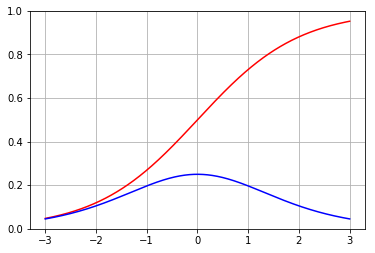

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, sig_Y, color = 'red')
plt.plot(X, deri_sig_Y, color = 'blue')
plt.grid()
plt.show()

## 8. 아이리스 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.
-  아이리스 데이터의 4가지 속성(꽃받침 길이/폭, 꽃잎 길이/폭)을 이용하여
     품종을 예측
- 단, 정확도는 98% 이상일 것

In [25]:
iris = sns.load_dataset("iris")
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [26]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
dataset = iris.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y = np_utils.to_categorical(Y, 3)

Using TensorFlow backend.


In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense

seed = 0
tf.set_random_seed(seed)

In [29]:
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
# 모델 실행
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
150/150 [==============================] - 0s 140us/step - loss: 0.1027 - acc: 0.9733
Epoch 2/100
150/150 [==============================] - 0s 93us/step - loss: 0.0992 - acc: 0.9800
Epoch 3/100
150/150 [==============================] - 0s 93us/step - loss: 0.1034 - acc: 0.9667
Epoch 4/100
150/150 [==============================] - 0s 80us/step - loss: 0.1031 - acc: 0.9733
Epoch 5/100
150/150 [==============================] - 0s 93us/step - loss: 0.0975 - acc: 0.9667
Epoch 6/100
150/150 [==============================] - 0s 93us/step - loss: 0.1093 - acc: 0.9667
Epoch 7/100
150/150 [==============================] - 0s 87us/step - loss: 0.0974 - acc: 0.9667
Epoch 8/100
150/150 [==============================] - 0s 73us/step - loss: 0.0989 - acc: 0.9733
Epoch 9/100
150/150 [==============================] - 0s 87us/step - loss: 0.0949 - acc: 0.9800
Epoch 10/100
150/150 [==============================] - 0s 87us/step - loss: 0.0964 - acc: 0.9667
Epoch 11/100
150/150 [======

150/150 [==============================] - 0s 93us/step - loss: 0.0669 - acc: 0.9800
Epoch 85/100
150/150 [==============================] - 0s 73us/step - loss: 0.0693 - acc: 0.9800
Epoch 86/100
150/150 [==============================] - 0s 67us/step - loss: 0.0721 - acc: 0.9733
Epoch 87/100
150/150 [==============================] - 0s 87us/step - loss: 0.0669 - acc: 0.9800
Epoch 88/100
150/150 [==============================] - 0s 80us/step - loss: 0.0734 - acc: 0.9733
Epoch 89/100
150/150 [==============================] - 0s 73us/step - loss: 0.0688 - acc: 0.9800
Epoch 90/100
150/150 [==============================] - 0s 80us/step - loss: 0.0666 - acc: 0.9800
Epoch 91/100
150/150 [==============================] - 0s 93us/step - loss: 0.0652 - acc: 0.9867
Epoch 92/100
150/150 [==============================] - 0s 80us/step - loss: 0.0672 - acc: 0.9800
Epoch 93/100
150/150 [==============================] - 0s 73us/step - loss: 0.0702 - acc: 0.9733
Epoch 94/100
150/150 [===========

In [33]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

150/150 [==============================] - 0s 93us/step

 Accuracy: 0.9867


## 9. 피마 인디언 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.
- 피마 인디언 데이터의 8가지 속성을 이용하여 당뇨병 여부를 판단할 것
- 단, 데이터의 25%는 테스트 데이터로 사용하여 정확도를 구할 것

In [34]:
df = pd.read_csv('pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", "thickness",  
                 "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
# seed 값 생성
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [36]:
from sklearn.model_selection import train_test_split
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
                                                    random_state=seed)

In [37]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
# 모델 실행
model.fit(X_train, Y_train, epochs=200, batch_size=10)

Epoch 1/200
576/576 [==============================] - 0s 472us/step - loss: 2.6810 - acc: 0.4375
Epoch 2/200
576/576 [==============================] - 0s 73us/step - loss: 0.9872 - acc: 0.6337
Epoch 3/200
576/576 [==============================] - 0s 78us/step - loss: 0.8759 - acc: 0.6563
Epoch 4/200
576/576 [==============================] - 0s 75us/step - loss: 0.8195 - acc: 0.6285
Epoch 5/200
576/576 [==============================] - 0s 73us/step - loss: 0.7722 - acc: 0.6250
Epoch 6/200
576/576 [==============================] - 0s 75us/step - loss: 0.7378 - acc: 0.6111
Epoch 7/200
576/576 [==============================] - 0s 76us/step - loss: 0.7126 - acc: 0.6319
Epoch 8/200
576/576 [==============================] - 0s 76us/step - loss: 0.6809 - acc: 0.6302
Epoch 9/200
576/576 [==============================] - 0s 75us/step - loss: 0.6477 - acc: 0.6545
Epoch 10/200
576/576 [==============================] - 0s 75us/step - loss: 0.6323 - acc: 0.6424
Epoch 11/200
576/576 [======

576/576 [==============================] - 0s 75us/step - loss: 0.5404 - acc: 0.7135
Epoch 85/200
576/576 [==============================] - 0s 73us/step - loss: 0.5313 - acc: 0.7378
Epoch 86/200
576/576 [==============================] - 0s 76us/step - loss: 0.5310 - acc: 0.7396
Epoch 87/200
576/576 [==============================] - 0s 69us/step - loss: 0.5354 - acc: 0.7292
Epoch 88/200
576/576 [==============================] - 0s 69us/step - loss: 0.5224 - acc: 0.7292
Epoch 89/200
576/576 [==============================] - 0s 71us/step - loss: 0.5227 - acc: 0.7240
Epoch 90/200
576/576 [==============================] - 0s 69us/step - loss: 0.5247 - acc: 0.7257
Epoch 91/200
576/576 [==============================] - 0s 71us/step - loss: 0.5245 - acc: 0.7257
Epoch 92/200
576/576 [==============================] - 0s 71us/step - loss: 0.5280 - acc: 0.7378
Epoch 93/200
576/576 [==============================] - 0s 71us/step - loss: 0.5193 - acc: 0.7292
Epoch 94/200
576/576 [===========

576/576 [==============================] - 0s 76us/step - loss: 0.4995 - acc: 0.7517
Epoch 168/200
576/576 [==============================] - 0s 73us/step - loss: 0.4834 - acc: 0.7639
Epoch 169/200
576/576 [==============================] - 0s 80us/step - loss: 0.4902 - acc: 0.7622
Epoch 170/200
576/576 [==============================] - 0s 80us/step - loss: 0.4832 - acc: 0.7552
Epoch 171/200
576/576 [==============================] - 0s 80us/step - loss: 0.4796 - acc: 0.7656
Epoch 172/200
576/576 [==============================] - 0s 78us/step - loss: 0.4800 - acc: 0.7639
Epoch 173/200
576/576 [==============================] - 0s 75us/step - loss: 0.4835 - acc: 0.7674
Epoch 174/200
576/576 [==============================] - 0s 73us/step - loss: 0.4826 - acc: 0.7743
Epoch 175/200
576/576 [==============================] - 0s 71us/step - loss: 0.4798 - acc: 0.7847
Epoch 176/200
576/576 [==============================] - 0s 73us/step - loss: 0.4900 - acc: 0.7569
Epoch 177/200
576/576 [=

In [40]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

192/192 [==============================] - 0s 266us/step

 Accuracy: 0.7344
